In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples

In [10]:
sorghum

,Lab Number\n,Date Received,Customer Sample ID,Sample Name 1,Sample Name 2,Latitude,Longitude,Depth,Colour,Gravel_percent,...,pH Level (CaCl2),pH Level (H2O),Total Nitrogen,Total Phosphorus,Total Carbon,% Clay,% Course Sand,% Fine Sand,% Sand,% Silt
0,2KGS24043,12/09/2024,S1,SB WA,Sorghum Bulbosum,-19.615600,147.961153,0-10,BROR,25-30,...,5.9,6.6,0.02,84.9,0.40,9.87,63.40,22.77,86.17,3.97
1,2KGS24044,12/09/2024,S2,SE WA,Sorghum Ecarinatum,-17.354575,123.741343,0-10,BROR,15-20,...,5.6,6.6,0.03,56.3,0.53,6.93,59.63,31.45,91.08,2.00
2,2KGS24045,12/09/2024,S3,SE NT,Sorghum Exstans,-12.434222,130.876718,0-10,BRGR,15-20,...,5.7,6.6,0.09,108.5,2.41,15.86,38.85,36.80,75.65,8.49
3,2KGS24046,12/09/2024,S4,SI WA,Sorghum Interjectum,-15.992228,128.974654,0-10,BROR,5-Oct,...,6.0,6.7,0.05,118.8,0.54,9.20,50.41,27.01,77.42,13.37
4,2KGS24047,12/09/2024,S5,SI NT,Sorghum Intrans,-14.407553,132.197353,0-10,BRRD,5,...,6.0,6.8,0.03,176.2,0.44,43.07,29.41,18.50,47.91,9.02
5,2KGS24048,12/09/2024,S6,SL NSW,Sorghum Leiocladum,-28.941111,152.428611,0-10,DKGR,5,...,6.0,6.5,0.22,237.2,3.89,14.71,18.75,46.50,65.25,20.04
6,2KGS24049,12/09/2024,S7,SM NT,Sorghum Macrospermum,-14.407640,132.197460,0-10,BR,5,...,6.1,6.8,0.22,684.7,3.65,25.68,4.38,30.35,34.73,39.58
7,2KGS24050,12/09/2024,S8,SP DW NT,Sorghum Plumosum,-16.062387,133.428109,0-10,GR,45-50,...,7.1,8.2,0.03,169.4,1.30,8.08,64.16,21.66,85.82,6.10
8,2KGS24051,12/09/2024,S9,SPT WA,Sorghum Plumosum var teretifolium,-15.992164,128.984524,0-10,BRGR,35-40,...,5.8,6.8,0.09,139.5,1.34,10.87,42.47,34.76,77.23,11.91
9,2KGS24052,12/09/2024,S10,SS NT,Sorghum Stipoideum,-12.511434,130.996383,0-10,GRBR,45-50,...,5.6,6.5,0.12,131.8,2.23,10.26,52.36,28.10,80.46,9.28


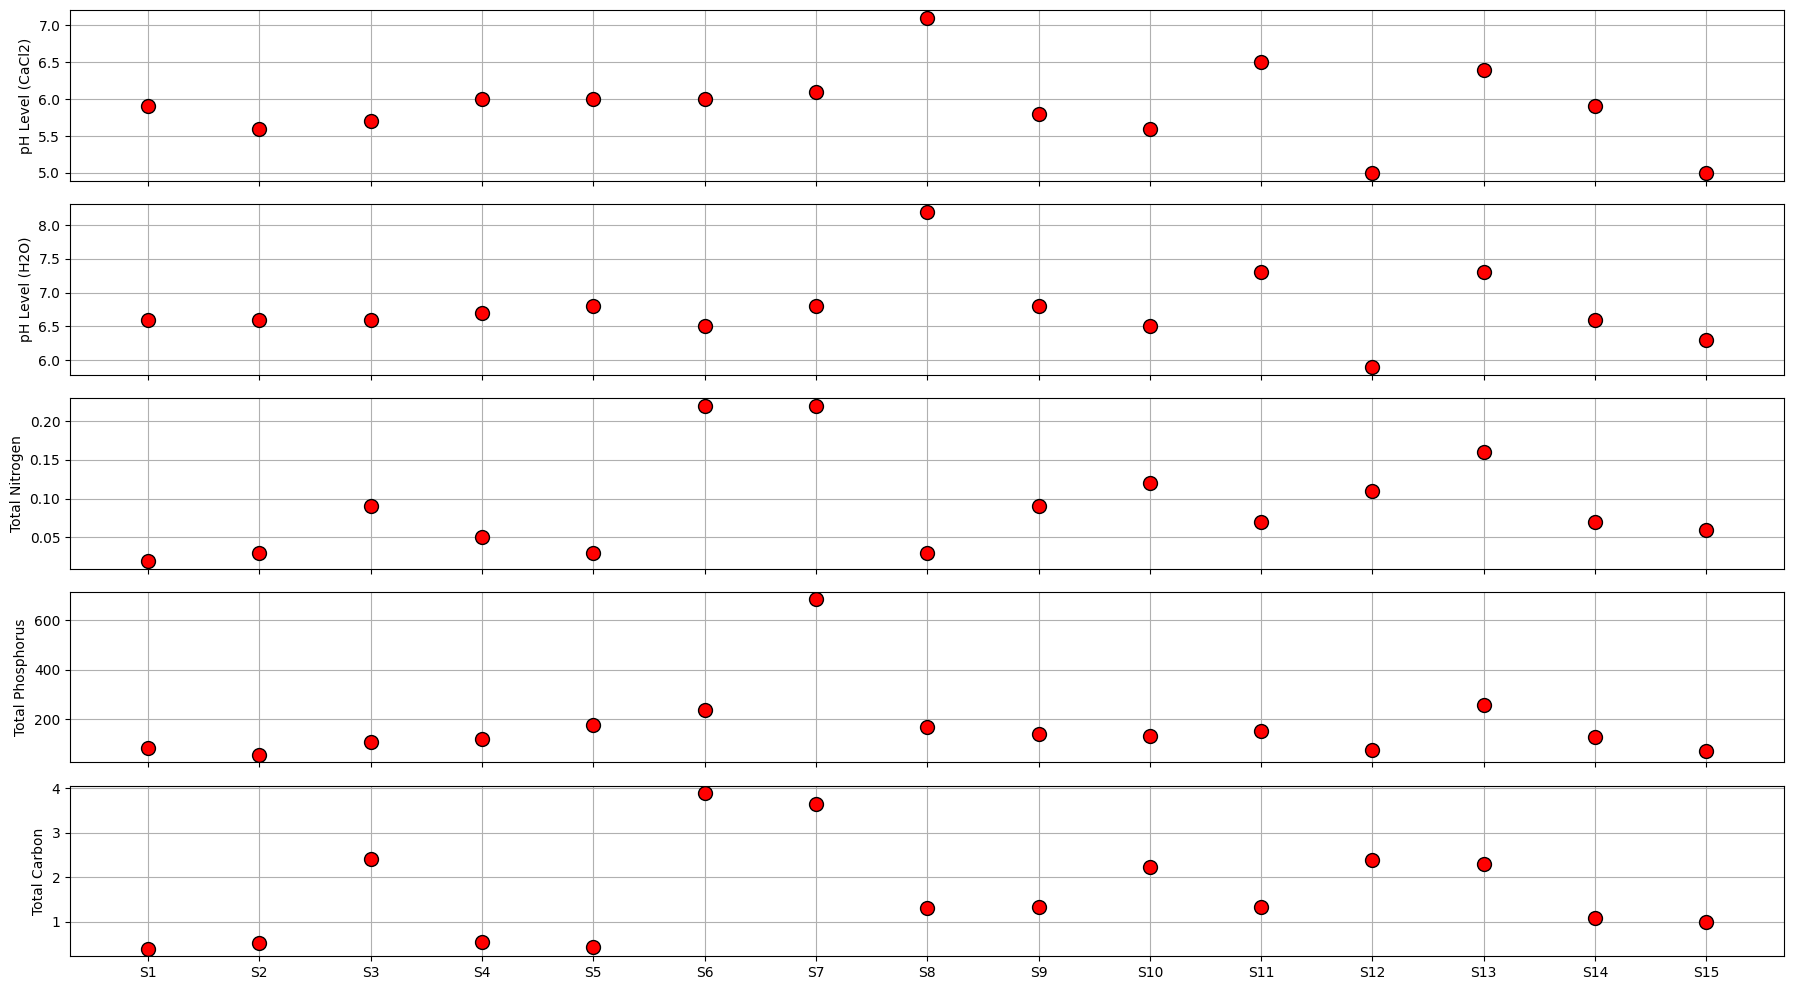

In [47]:
fig, axes = plt.subplots(nrows=5, sharex=True, sharey=False)
fig.set_size_inches(18, 10)

for (prop, axis) in zip(("pH Level (CaCl2)", "pH Level (H2O)", "Total Nitrogen", "Total Phosphorus", "Total Carbon"), axes):
    axis.plot(sorghum["Customer Sample ID"], sorghum[prop], linestyle="none", marker='o', mec="black", mfc="red", markersize=10)
    axis.set_ylabel(prop)
    axis.grid()
    
plt.tight_layout()
plt.show()

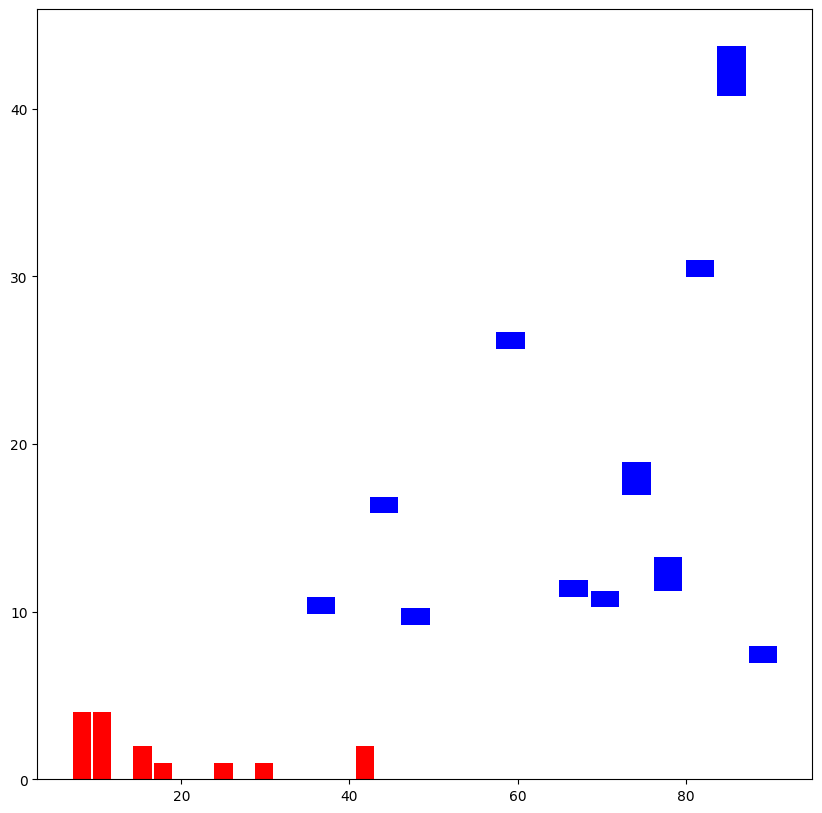

In [57]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.hist(sorghum["% Clay"], rwidth=0.9, bins=15, color="red")
axes.hist(sorghum["% Sand"], bottom=sorghum["% Clay"], rwidth=0.9, bins=15, color="blue")

plt.show()